In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\data\\match_data.csv').drop('Unnamed: 0', axis=1)
df.shape

(4006, 34)

Wining team % (Radiant, Dire)

In [3]:
print(len(df[df['radiant_win'] == True])/len(df), len(df[df['radiant_win'] != True])/len(df))

0.5848726909635547 0.41512730903644535


Wining team % (Radiant, Dire) on each cluster

In [4]:
clusters = pd.unique(df['cluster'])
for i in clusters:
    cluster = df[df['cluster']==i]
    print(str(i), str(len(cluster)),'Radiant',str(len(cluster[cluster['radiant_win'] == True])/len(cluster)), end = '; ')
    print('Dire', str(len(cluster[cluster['radiant_win'] != True])/len(cluster)))


236 99 Radiant 0.5353535353535354; Dire 0.46464646464646464
225 268 Radiant 0.5783582089552238; Dire 0.4216417910447761
117 31 Radiant 0.6451612903225806; Dire 0.3548387096774194
232 247 Radiant 0.5789473684210527; Dire 0.42105263157894735
153 79 Radiant 0.5569620253164557; Dire 0.4430379746835443
227 162 Radiant 0.5802469135802469; Dire 0.41975308641975306
182 211 Radiant 0.5213270142180095; Dire 0.4786729857819905
156 76 Radiant 0.6578947368421053; Dire 0.34210526315789475
187 195 Radiant 0.5487179487179488; Dire 0.4512820512820513
183 171 Radiant 0.6374269005847953; Dire 0.36257309941520466
152 63 Radiant 0.5714285714285714; Dire 0.42857142857142855
193 54 Radiant 0.5370370370370371; Dire 0.46296296296296297
231 149 Radiant 0.5704697986577181; Dire 0.42953020134228187
161 99 Radiant 0.8080808080808081; Dire 0.1919191919191919
181 189 Radiant 0.5026455026455027; Dire 0.4973544973544973
155 78 Radiant 0.5897435897435898; Dire 0.41025641025641024
154 81 Radiant 0.5679012345679012; Dire

Converting slot id to pick # and team

A player's slot is returned via an 8-bit unsigned integer. The first bit represent the player's team, false if Radiant and true if dire. The final three bits represent the player's position in that team, from 0-4.

In [5]:
slot_id = df[df.columns[[i for i in range(5,33,3)]]]

In [6]:
sample = slot_id.iloc[1,:]
a = [bin(i).replace('0b', '') for i in sample]
a

['0',
 '1',
 '10',
 '11',
 '100',
 '10000000',
 '10000001',
 '10000010',
 '10000011',
 '10000100']

In [7]:
for b in range(0,10):
    player_team = [b//5 for i in range(len(df))]
    player_position = [b%5 for i in range(len(df))]
    df['player_team'+str(b)] = player_team
    df['player_position'+str(b)] = player_position
print(len(df.columns))
df.to_csv('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\\data\\extended_match_data.csv')

54


Creating dataset for heros


In [8]:
import json

with open('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\\data\\heros.json', 'r') as json_file:
    data = json.load(json_file)
    heros_df = pd.DataFrame()
    id = []
    localized_name = []
    base_str = []
    base_agi = []
    base_int = []
    attack_type = []
    primary_attr = []
    health = []
    damage = []

    for element in list(data.keys())[1:]:
        id.append(data[element]['id'])
        localized_name.append(data[element]['localized_name'])
        attack_type.append(data[element]['attack_type'])
        base_str.append(data[element]['base_str'])
        base_agi.append(data[element]['base_agi'])
        base_int.append(data[element]['base_int'])
        primary_attr.append(data[element]['primary_attr'])
        health.append(data[element]['base_str']*20+200)
        min_damage = data[element]['base_'+data[element]['primary_attr']]+data[element]['base_attack_min']
        max_damage = data[element]['base_'+data[element]['primary_attr']]+data[element]['base_attack_max']
        damage.append((min_damage+max_damage)/2)

        

    heros_df['id'] = id
    heros_df['localized_name'] = localized_name
    heros_df['primary_attr'] = primary_attr
    heros_df['attack_type'] = attack_type  
    heros_df['base_str'] = base_str
    heros_df['base_agi'] = base_agi
    heros_df['base_int'] = base_int
    heros_df['health'] = health
    heros_df['damage'] = damage




In [9]:
heros_df.to_csv('C:\\Users\\dilovar.mashrabov\\Desktop\\Junior Semester_2\\Data Science\\Project\\data\\heros.csv')

Strongest and most picked heroes 

In [10]:
hero_dict = {}
for i in heros_df['id']:
    hero_dict[i] = 0

for game_index in range(len(df)):
    game = df[df.columns[[i for i in range(6,35,3)]]].iloc[game_index]
    for hero in game.values:
        hero_dict[hero]+=1

In [11]:
import collections
sorted_x = sorted(hero_dict.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)

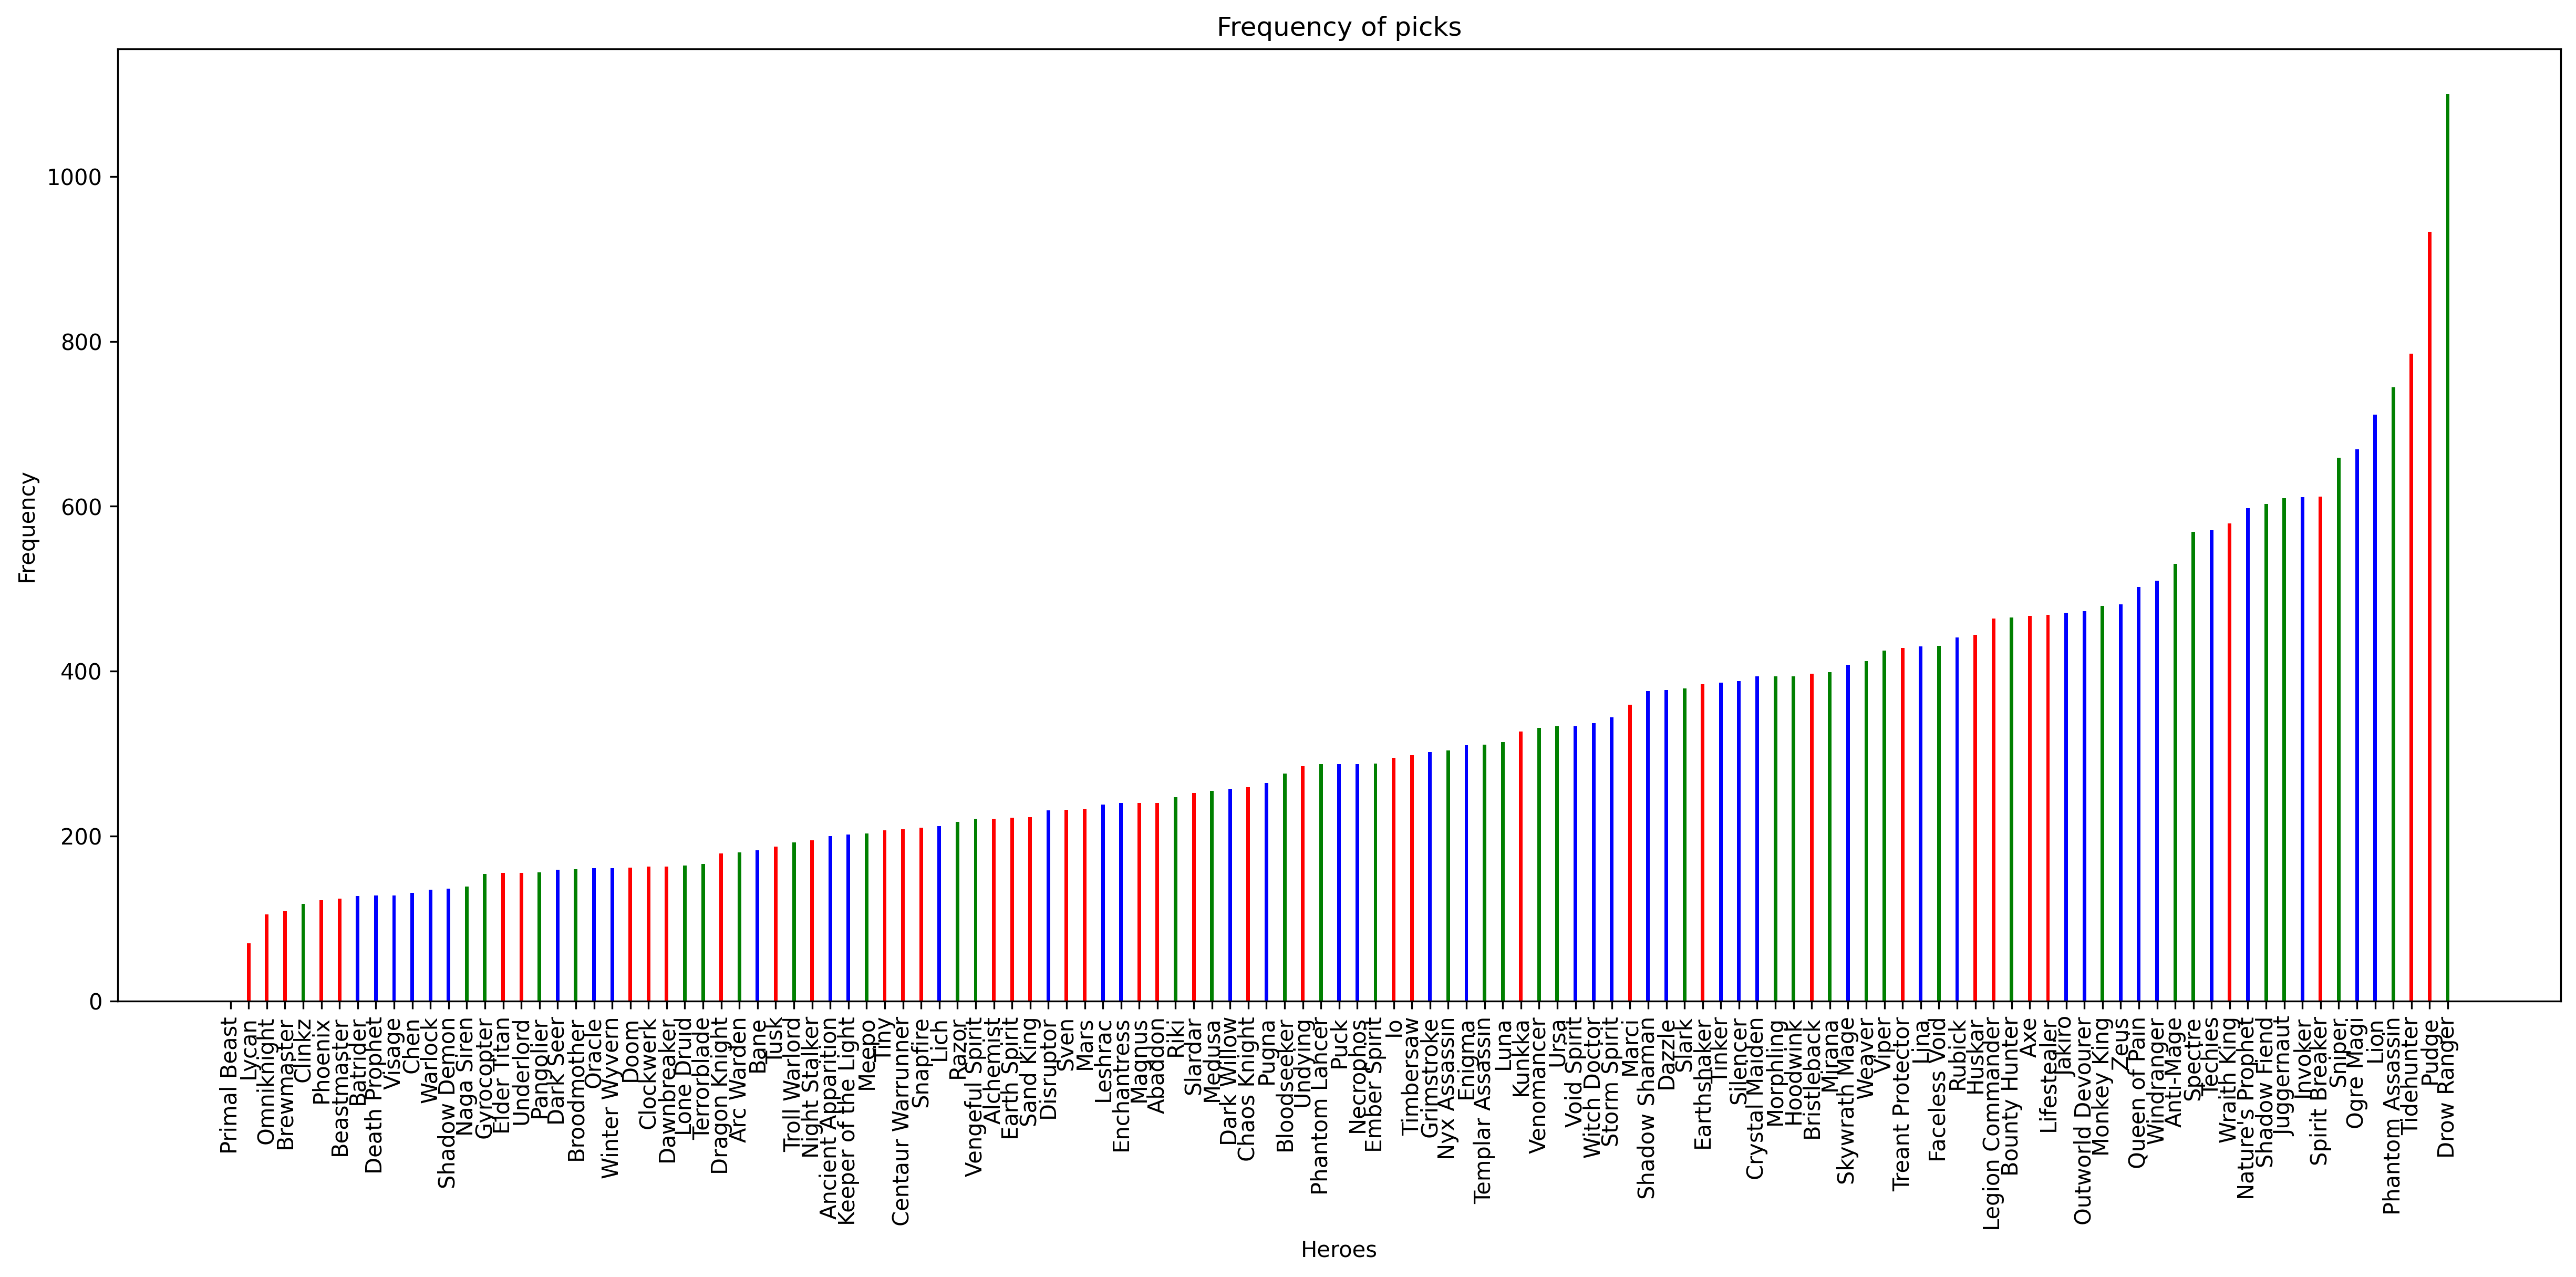

In [12]:
import matplotlib.pyplot as plt
clr = []
for i in sorted_dict.keys():
    if str(heros_df['primary_attr'][heros_df['id'] == i].values)[2:-2] == 'agi':
        clr.append('green')
    elif str(heros_df['primary_attr'][heros_df['id'] == i].values)[2:-2] == 'int':
        clr.append('blue')
    else:
        clr.append('red')
plt.figure(figsize=(20,8), dpi=300)
plt.title('Frequency of picks')
plt.xlabel('Heroes')
plt.ylabel('Frequency')
plt.bar([i for i in range(0,len(sorted_x)*4,4)], sorted_dict.values(), color=clr)
names = [str(heros_df['localized_name'][heros_df['id']==i].values)[2:-2] for i in sorted_dict.keys()]
plt.xticks([i for i in range(0,len(sorted_x)*4,4)], names, rotation = 90)
plt.show()

Win rate of each hero 

In [13]:
total_games = []
wins = []

for hero in list(hero_dict.keys()):
    games = 0
    win = 0
    for i in range(len(df)):
        game = df.iloc[i].values[[i for i in range(6,35,3)]]
        radiant = game[:5]
        dire = game[5:]
        if hero in game:
            if hero in radiant and df.iloc[i].values[1] == True:
                win += 1
            if hero in dire and df.iloc[i].values[1] == False:
                win += 1
            games += 1
    total_games.append(games)
    wins.append(win)

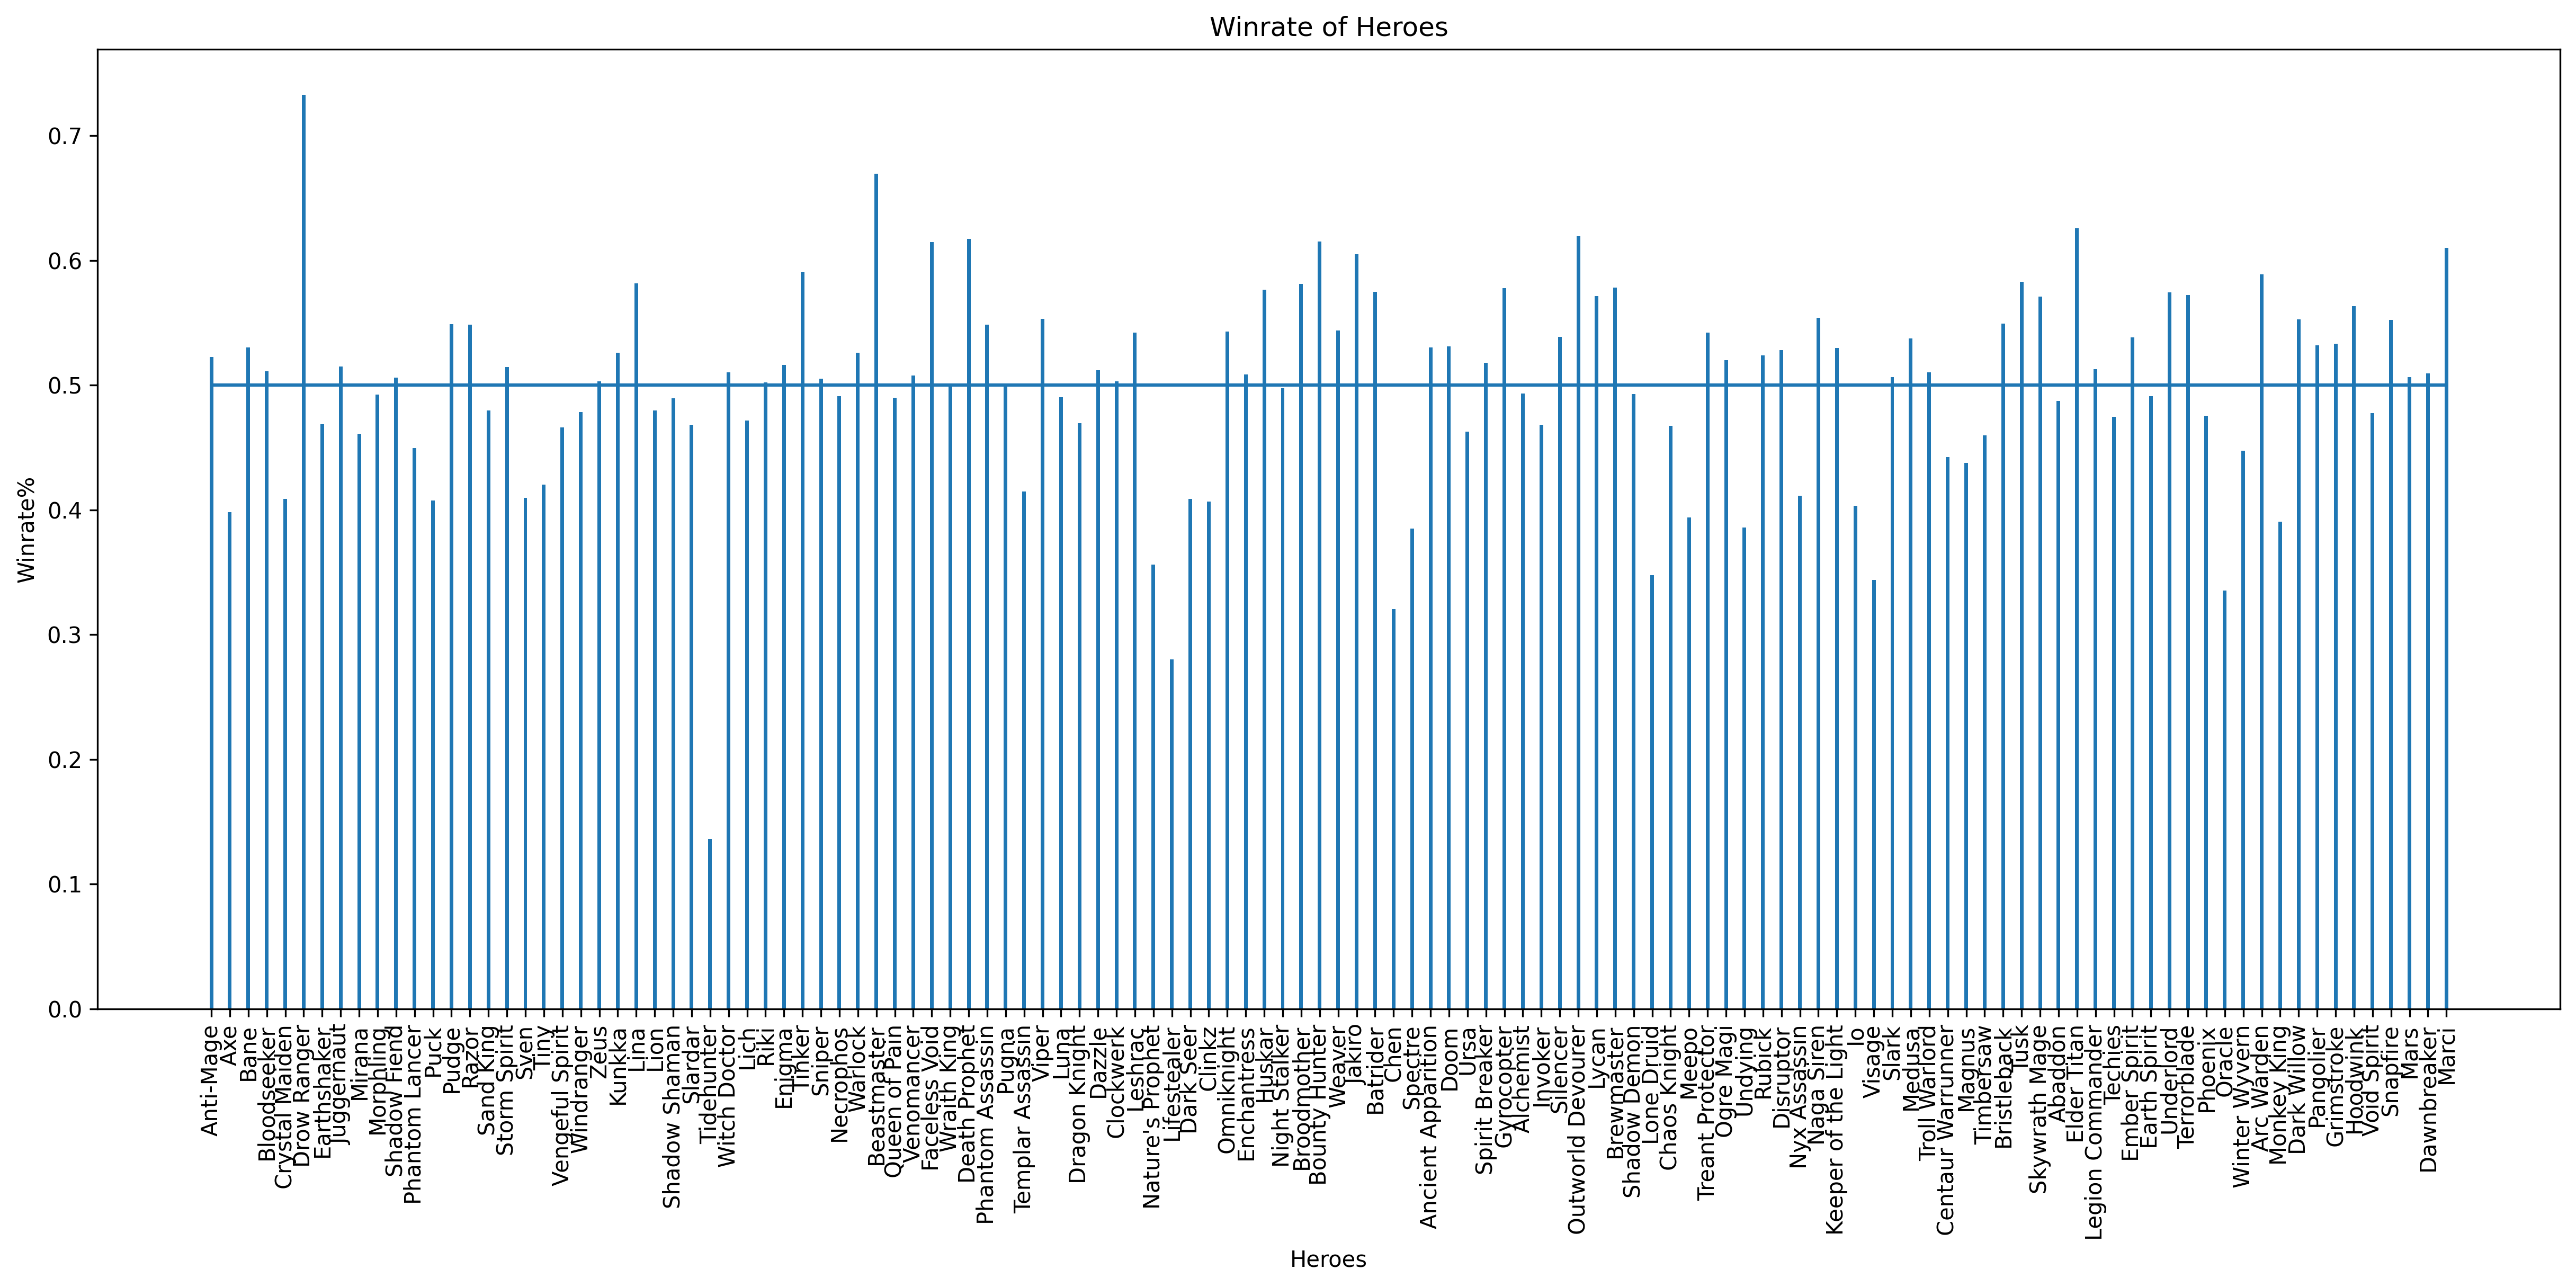

In [14]:
percentages = [wins[i]/total_games[i] for i in range(len(hero_dict)-1)]
x = [i for i in range(0,(len(sorted_x)-1)*4,4)]

plt.figure(figsize=(20,8), dpi=300)
plt.title('Winrate of Heroes')
plt.xlabel('Heroes')
plt.ylabel('Winrate%')
plt.bar(x, percentages)
plt.hlines(0.5, xmin=min(x), xmax=max(x))
names = [str(heros_df['localized_name'][heros_df['id']==i].values)[2:-2] for i in hero_dict.keys()]

plt.xticks([i for i in range(0,(len(sorted_x)-1)*4,4)], names[:-1], rotation = 90)
plt.show()



Replacing hero id with other representation


In [27]:
from sklearn.model_selection import train_test_split
X = df[df.columns[[i for i in range(6,35,3)]]]
Y = df['radiant_win']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(x_train), len(y_train), len(x_test), len(y_train))

3204 3204 802 3204


In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', splitter='best')
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

0.64214463840399


In [ ]:
b = 1000000
a = [0,1]
c = [a.append(a[i]+a[i+1]) for i in range(b-len(a))]
# a[-1]